# Nestle Stock Price Prediction 
  

Goal  - Before Investing into any company an investor should study Historical stock Prices of that company , analyze the Opening-closing and High/Low Prices for better understanding of the performance of that company in share markets.
Here we are predicting the Closing Price of Nestle Shares with the available Independent Features.  
Details about the data :

Segment - Equity 


Security Name - NESTLE INDIA LTD

Period - Daily  

Jan 2012 to 21st April 2022.(span- 10years)


From this Data we can get to know :       
1) Which Feature or Features are significant in predicting the close Price.

2) How well those Features describe the Close price of this Company.   



## Load Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Load Data 

[This Data was downloaded from BSE India's official website. Click here to download or explore the data on the website](https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0)

In [66]:
df=pd.read_csv('/content/drive/MyDrive/machine_learning/nestle.csv')

## Data Exploration

In [67]:
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,21-April-2022,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80
1,20-April-2022,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60
2,19-April-2022,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90
3,18-April-2022,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35
4,13-April-2022,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30


In [68]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2548,6-January-2012,4114.0,4160.0,4076.0,4143.25,4129.486321,3107,444,12830314.0,2069.0,66.59,84.0,29.25
2549,5-January-2012,4118.0,4126.9,4080.0,4101.85,4106.848723,1018,270,4180772.0,357.0,35.07,46.9,-16.15
2550,4-January-2012,4100.0,4125.0,4081.4,4120.60,4105.106055,2857,247,11728288.0,2312.0,80.92,43.6,20.60
2551,3-January-2012,4061.0,4110.1,4060.1,4095.35,4091.474315,5003,886,20469646.0,2817.0,56.31,50.0,34.35
2552,2-January-2012,4139.9,4139.9,4044.0,4070.35,4085.640979,7760,1132,31704574.0,5776.0,74.43,95.9,-69.55


In [69]:
df.shape

(2553, 13)

In this Dataset , we have total 2553 tows and 13 columns. 
Data Ranging from 2nd January 2012 to 21st April 2022

In [70]:
df.size

33189

In [71]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2553.000000,2.553000e+03,2551.000000,2551.000000,2553.000000,2553.000000
mean,9338.023188,9429.710419,9226.855934,9324.960556,9327.503179,5521.380337,1004.099491,4.761923e+07,3264.052528,49.024461,202.854485,-13.062632
std,4940.554627,4986.783271,4878.971233,4932.776537,4929.373727,10416.942384,1137.547557,8.502888e+07,8652.860793,19.119739,174.985173,157.849187
min,3970.000000,3995.000000,3930.000000,3942.450000,3936.768632,39.000000,6.000000,1.721420e+05,33.000000,1.270000,17.000000,-1381.300000
25%,5391.000000,5445.000000,5327.200000,5383.500000,5385.347807,1572.000000,442.000000,1.172133e+07,653.500000,35.575000,88.850000,-71.700000
50%,6804.000000,6868.900000,6747.300000,6809.950000,6813.150538,2618.000000,731.000000,2.222074e+07,1123.000000,46.870000,152.100000,-12.750000
75%,13299.950000,13690.950000,12850.000000,13455.450000,13387.505382,4981.000000,1199.000000,4.938465e+07,2225.500000,59.130000,263.150000,48.300000
max,20452.000000,20599.950000,20243.800000,20439.450000,20417.372402,154684.000000,20964.000000,2.155655e+09,152993.000000,98.930000,1950.000000,1523.300000


From the description we get to know that ; 

Maximum opening price recorded till date is Rs. 20452 and minimum is 3970.

Maximum Closing Price is Rs 20439.45 and Minimum price was Rs 3942.45. 

The Maximum Weighted Average Price was Rs 20417.37 and Rs 3936.76 was the minimum

The hiest price recorded till date is Rs 20599.95 and lowest is Rs 3995

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2553 entries, 0 to 2552
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2553 non-null   object 
 1   Open Price                 2553 non-null   float64
 2   High Price                 2553 non-null   float64
 3   Low Price                  2553 non-null   float64
 4   Close Price                2553 non-null   float64
 5   WAP                        2553 non-null   float64
 6   No.of Shares               2553 non-null   int64  
 7   No. of Trades              2553 non-null   int64  
 8   Total Turnover (Rs.)       2553 non-null   float64
 9   Deliverable Quantity       2551 non-null   float64
 10  % Deli. Qty to Traded Qty  2551 non-null   float64
 11  Spread High-Low            2553 non-null   float64
 12  Spread Close-Open          2553 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [73]:
df.corr()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
Open Price,1.000000,0.999722,0.999701,0.999490,0.999693,-0.076134,0.155587,0.191480,-0.093000,-0.246738,0.616536,-0.065212
High Price,0.999722,1.000000,0.999610,0.999793,0.999879,-0.073740,0.162156,0.194465,-0.092403,-0.248603,0.627006,-0.047052
Low Price,0.999701,0.999610,1.000000,0.999761,0.999858,-0.078191,0.150214,0.188937,-0.093886,-0.245208,0.604996,-0.047372
Close Price,0.999490,0.999793,0.999761,1.000000,0.999927,-0.075764,0.156813,0.191751,-0.093174,-0.246861,0.616866,-0.033314
WAP,0.999693,0.999879,0.999858,0.999927,1.000000,-0.075620,0.156683,0.191979,-0.093045,-0.247219,0.616620,-0.041972
No.of Shares,-0.076134,-0.073740,-0.078191,-0.075764,-0.075620,1.000000,0.452116,0.856353,0.868194,0.279279,0.078676,0.015336
No. of Trades,0.155587,0.162156,0.150214,0.156813,0.156683,0.452116,1.000000,0.464951,0.103851,-0.188500,0.432884,0.030636
Total Turnover (Rs.),0.191480,0.194465,0.188937,0.191751,0.191979,0.856353,0.464951,1.000000,0.655851,0.192031,0.273972,-0.000969
Deliverable Quantity,-0.093000,-0.092403,-0.093886,-0.093174,-0.093045,0.868194,0.103851,0.655851,1.000000,0.488715,-0.015550,-0.000877
% Deli. Qty to Traded Qty,-0.246738,-0.248603,-0.245208,-0.246861,-0.247219,0.279279,-0.188500,0.192031,0.488715,1.000000,-0.247729,0.008249


### Visualisation

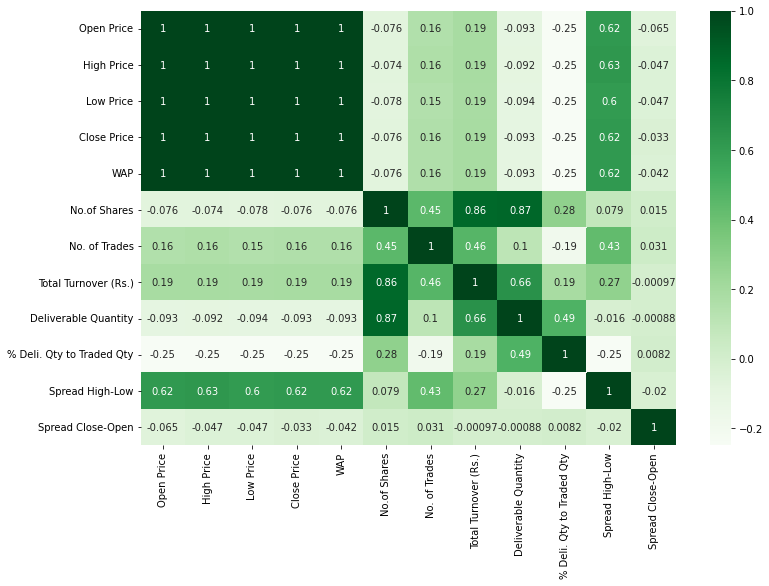

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linecolor='blue',cmap='Greens')

Weighted Average Price , Open , High and Low Prices has highest correlation with our Target column i.e. with Close Price. 
So , we are going to use only these four columns for better accuracy and predictions . 

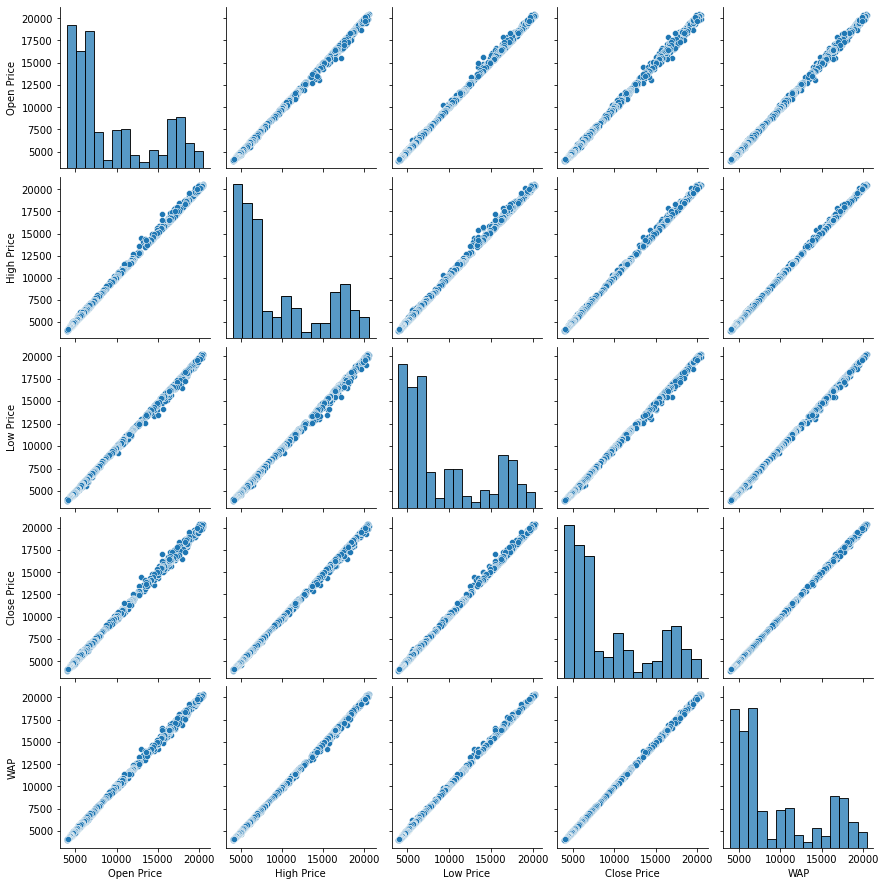

In [135]:
sns.pairplot(data=df);

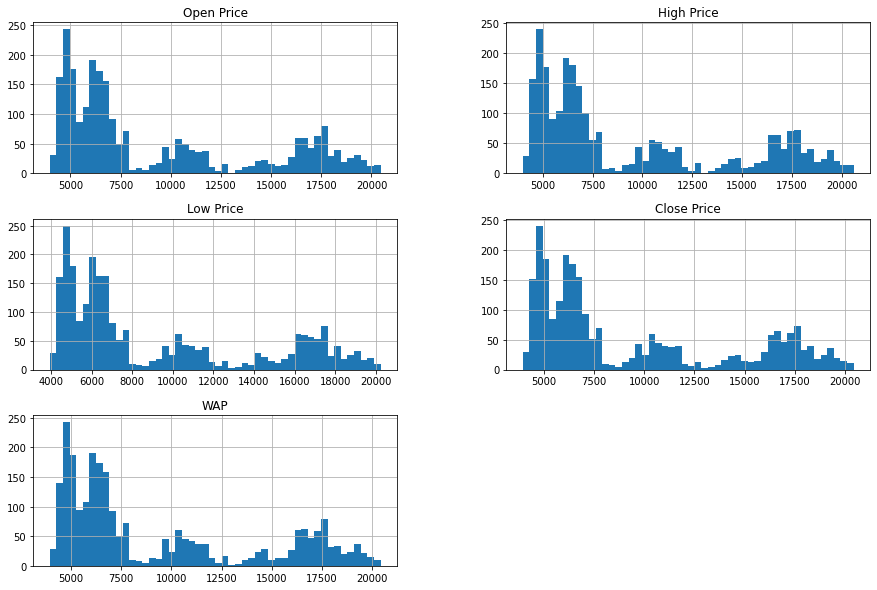

In [136]:
df.hist(bins=50,figsize=(15,10));

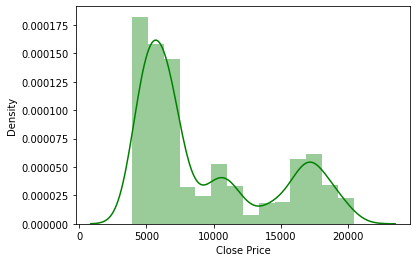

In [137]:
sns.distplot(df['Close Price'],hist=True,color='Green');

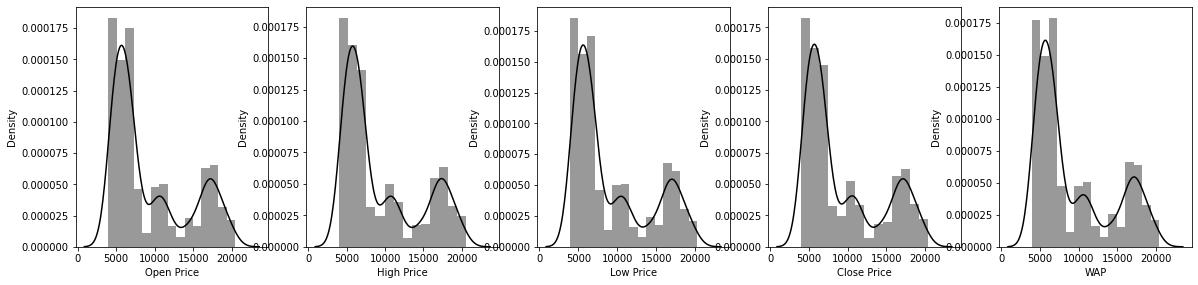

In [138]:
num_col=[col for col in df.columns if df[col].dtype != 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column],color='black');
        plt.xlabel(column)
    
        
    plotnumber += 1

## Feature Enginnering 

### Handling Missing Values 

In [75]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         2
% Deli. Qty to Traded Qty    2
Spread High-Low              0
Spread Close-Open            0
dtype: int64

We have only two missing values in this dataset,  so we can ignore them . 

### Handling Outliers . 

As we are going to focus only on Open , High and Low and Wap , Lets find out and Handle the outliers of these columns only. 

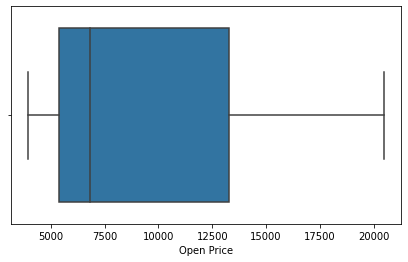

In [76]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Open Price',data=df,orient='h');

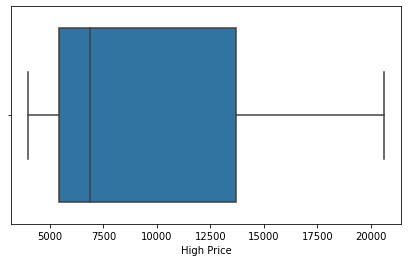

In [77]:
plt.figure(figsize=(7,4))
sns.boxplot(x='High Price',data=df,orient='h');

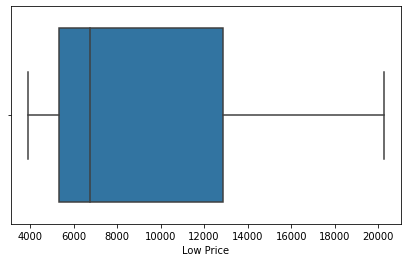

In [78]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Low Price',data=df,orient='h');

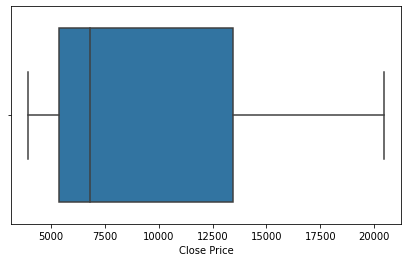

In [79]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Close Price',data=df,orient='h');

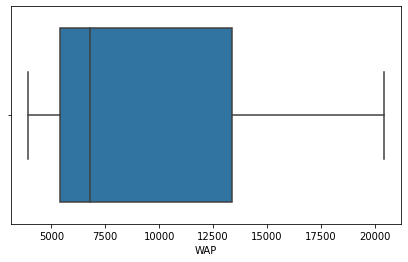

In [80]:
plt.figure(figsize=(7,4))
sns.boxplot(x='WAP',data=df,orient='h');

There are no outliers in these Columns 

### Exploratory Data Analysis 
Exploring and creating various graphical representations to understand the data better.

### Feature Extraction 

In [81]:
df['Date'] = pd.to_datetime(df['Date'])

In [82]:
df['Day']=df['Date'].dt.weekday
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [83]:
df.drop('Date',axis=1,inplace=True)

In [84]:
df['Day'].value_counts()

1    513
2    512
3    509
0    509
4    498
5      9
6      3
Name: Day, dtype: int64

In [85]:
df.head(15)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Day,Month,Year
0,18150.00,18572.95,17772.90,18205.80,18130.183442,4590,1770,83217542.0,950.0,20.70,800.05,55.80,3,4,2022
1,18100.10,18415.00,18017.15,18313.70,18295.559071,6069,1321,111035748.0,4677.0,77.06,397.85,213.60,2,4,2022
2,18470.05,18718.00,17845.60,17943.15,18355.093320,2904,716,53303191.0,1619.0,55.75,872.40,-526.90,1,4,2022
3,18294.50,18684.50,18294.50,18549.85,18511.224599,1496,586,27692792.0,557.0,37.23,390.00,255.35,0,4,2022
4,18371.20,18549.30,18248.25,18343.90,18388.967826,1150,550,21147313.0,573.0,49.83,301.05,-27.30,2,4,2022
5,18339.00,18497.00,18216.30,18430.00,18390.222000,2000,537,36780444.0,1412.0,70.60,280.70,91.00,1,4,2022
6,18499.00,18518.35,18225.00,18422.70,18385.862360,712,364,13090734.0,305.0,42.84,293.35,-76.30,0,4,2022
7,18180.00,18500.00,18101.00,18431.10,18361.677527,1197,514,21978928.0,534.0,44.61,399.00,251.10,4,4,2022
8,18198.60,18245.95,17986.75,18175.55,18131.799564,918,357,16644992.0,240.0,26.14,259.20,-23.05,3,4,2022
9,17900.00,18255.35,17871.20,18207.60,18096.243542,813,397,14712246.0,341.0,41.94,384.15,307.60,2,4,2022


In [86]:
df.tail(15)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Day,Month,Year
2538,4060.00,4090.00,4031.0,4077.00,4067.516506,16509,269,67150630.0,15598.0,94.48,59.00,17.00,3,1,2012
2539,4054.90,4060.00,4017.0,4025.95,4034.393162,1404,150,5664288.0,926.0,65.95,43.00,-28.95,2,1,2012
2540,4011.35,4070.00,4011.0,4054.90,4053.805327,5707,439,23135067.0,3987.0,69.86,59.00,43.55,1,1,2012
2541,3987.90,4024.00,3930.0,3994.10,3997.256831,732,162,2925992.0,382.0,52.19,94.00,6.20,0,1,2012
2542,3970.00,3995.00,3932.0,3942.45,3936.768632,154684,541,608955119.0,152993.0,98.91,63.00,-27.55,4,1,2012
2543,4060.00,4069.95,3949.0,3957.55,4001.764969,6480,1024,25931437.0,2893.0,44.65,120.95,-102.45,3,1,2012
2544,4080.05,4100.00,4061.0,4068.75,4082.916325,3167,498,12930596.0,2235.0,70.57,39.00,-11.30,2,1,2012
2545,4096.00,4124.95,4096.0,4108.40,4116.043885,8659,417,35640824.0,7594.0,87.70,28.95,12.40,1,1,2012
2546,4139.00,4160.00,4080.0,4093.40,4109.409150,1530,210,6287396.0,979.0,63.99,80.00,-45.60,0,1,2012
2547,4099.80,4146.95,4099.8,4125.00,4128.345238,84,38,346781.0,44.0,52.38,47.15,25.20,5,1,2012


In [87]:
days = {1:'Tuesday',0:'Monday',3:'Thursday',2:'Wednesday',4: 'Friday',5:'Saturday',6:'Sunday'}
df['Day'] = df['Day'].map(days)

### Graphical Representation

In [88]:
yw=df.groupby('Year')['No. of Trades'].sum()
yw

Year
2012    128129
2013    181198
2014    227595
2015    464161
2016    228811
2017    144073
2018    177668
2019    193401
2020    457517
2021    296816
2022     64097
Name: No. of Trades, dtype: int64

Text(0.5, 1.0, 'Annual Sales')

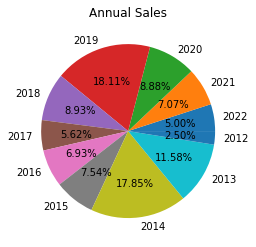

In [89]:
plt.pie(yw,labels=df['Year'].unique(),autopct='%1.2f%%');
plt.title('no. of trades')

In [90]:
dw = df.groupby('Day')['No. of Trades'].sum().reset_index()
dw.head(10)

,Day,No. of Trades
0,Friday,528457
1,Monday,484210
2,Saturday,2011
3,Sunday,933
4,Thursday,519870
5,Tuesday,490994
6,Wednesday,536991


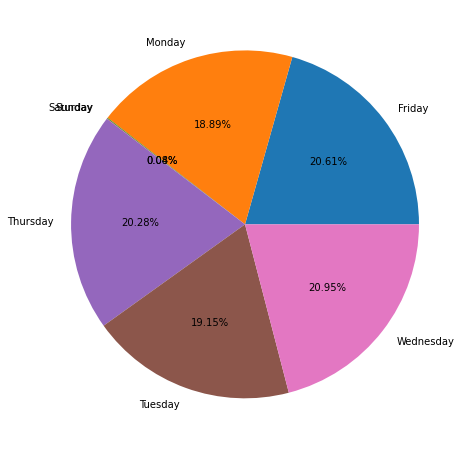

In [91]:
plt.figure(figsize=(10,8))
plt.pie(dw['No. of Trades'],labels= dw['Day'],autopct='%1.2f%%');

In [92]:
dw = df.groupby('Day')['High Price'].sum().reset_index()
dw.head(10)

,Day,High Price
0,Friday,4671316.70
1,Monday,4801443.15
2,Saturday,67300.55
3,Sunday,27766.95
4,Thursday,4823236.60
5,Tuesday,4842013.20
6,Wednesday,4840973.55


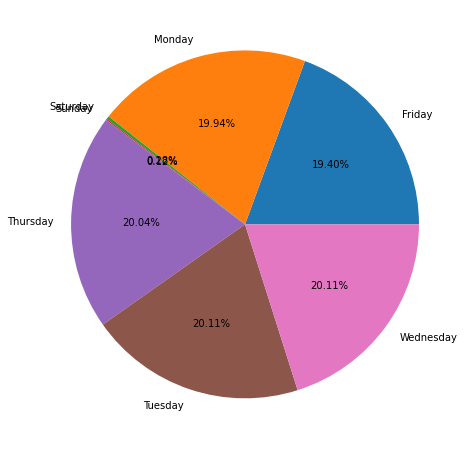

In [93]:
plt.figure(figsize=(10,8))
plt.pie(dw['High Price'],labels= dw['Day'],autopct='%1.2f%%');

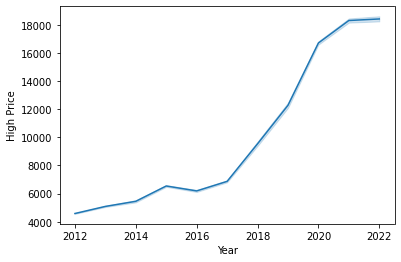

In [94]:
sns.lineplot(data=df, x="Year", y="High Price");

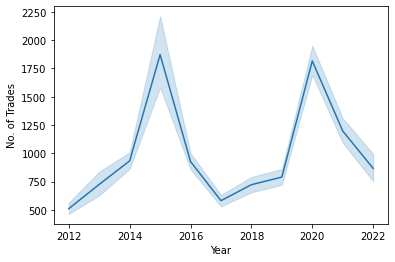

In [95]:
sns.lineplot(data=df, x="Year", y="No. of Trades");

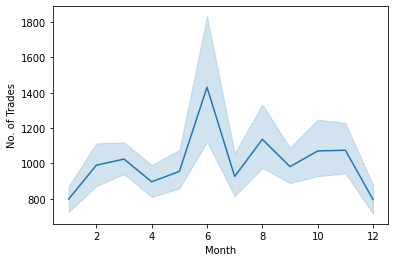

In [96]:
sns.lineplot(data=df,x='Month',y='No. of Trades');

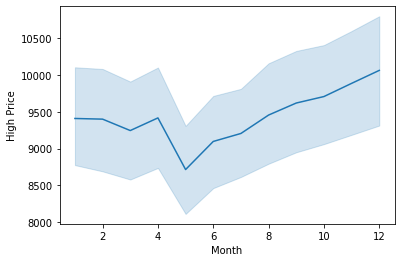

In [97]:
sns.lineplot(data=df,x='Month',y='High Price');

**OBSERVATIONS**



*   From 2012 to 2022 Max. number of trades were in the years 2018 (18%) , 2014(17%) and 2013(11%) and lowest were in years 2012(2.5%) , 2017(5.6%) and 2016(6.9%)
*   Wednesday , Friday and Thursday are the days when maximum number of trades takes place. 

-   Usually the stock is at high price on Wednesday , Tuesday and Thursdays. 

-   In 2012, the stock price was at its low, the line elevated at 2015 when the price started rising and from then the line went on elevating till 2021 till April 2022 , It is somewhat constant and changes within the 18000 Range. 

-  The line has formed a peak at the 6th month in the graph , which means that MAx no of trades happens in the month of June. 

## Model Building

**Simple Linear Regression**

### Feature Selection 

In [98]:
df.columns

Index(['Open Price', 'High Price', 'Low Price', 'Close Price', 'WAP',
       'No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],
      dtype='object')

In [99]:
df.drop(['No.of Shares', 'No. of Trades', 'Total Turnover (Rs.)',
       'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread High-Low',
       'Spread Close-Open', 'Day', 'Month', 'Year'],axis=1,inplace=True)

In [100]:
X=df[['WAP']]
y=df['Close Price']

**Applying Algorithm**

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
lr=LinearRegression()

In [105]:
lr.fit(X_train,y_train)

LinearRegression()

In [106]:
lr.score(X_train,y_train)

0.9998572935940231

In [107]:
lr.score(X_test,y_test)

0.9998365410513401

we got a generalized model for this dataset by using Simple Linear Regression.

### Best Fit Line

In [108]:
lr.coef_

array([1.00045917])

In [109]:
lr.intercept_

-7.890221724750518

Text(0, 0.5, 'Close Price')

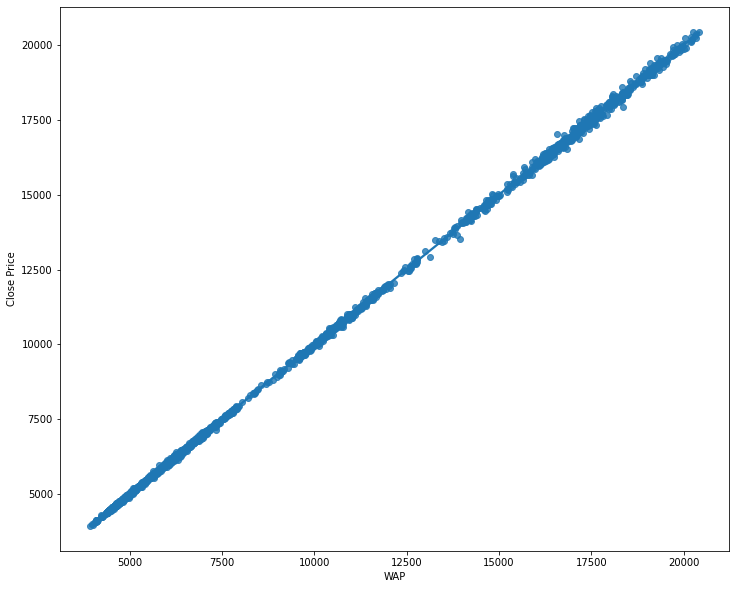

In [110]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('WAP')
plt.ylabel("Close Price")

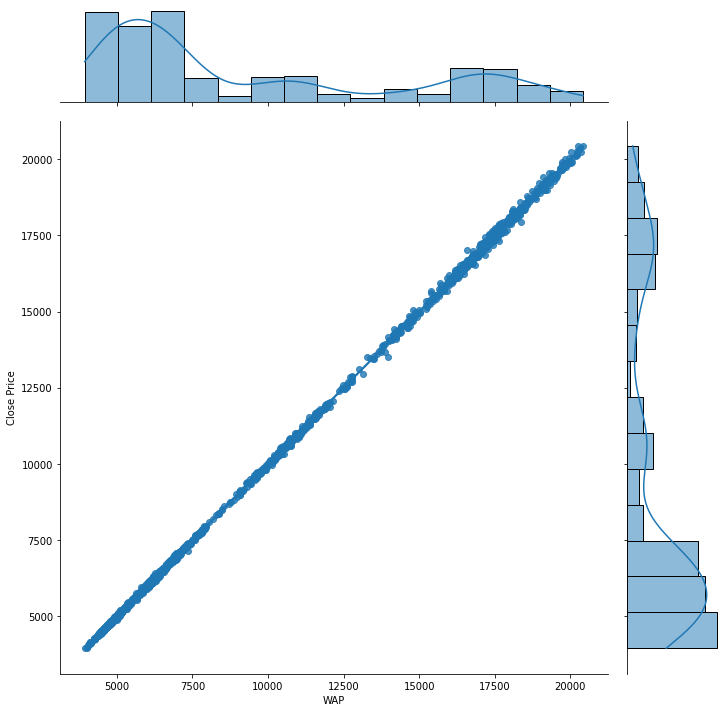

In [111]:
sns.jointplot(x='WAP', y='Close Price', data=df, kind='reg', size=10);

### Performace Measures

In [112]:
y_pred = lr.predict(X_test)

In [113]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998365410513401
MSE =  3821.993512241226


**COMPARING ACTUAL AND PREDICTED VALUES**

In [114]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [115]:
lr_diff.head(5)

,Actual Value,Predicted Value
249,17086.25,17111.878458
63,19328.80,19360.946506
1770,7045.10,7042.596232
1835,6317.25,6278.206706
2428,4509.75,4502.130628


In [116]:
lr_diff.tail()

,Actual Value,Predicted Value
478,16288.65,16368.388952
889,10341.50,10419.638570
2062,5043.20,5039.600519
1506,5199.60,5096.897822
537,16775.95,16739.818933


In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
scores  

array([0.99984708, 0.99986014, 0.99988188, 0.99984267, 0.99985233])

In [118]:
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.9998568224000902

### Applying the Multiple Regression Algorithm

In [119]:
X=df.drop('Close Price',axis=1)
y=df['Close Price']

In [120]:
X.shape

(2553, 4)

In [121]:
y.shape

(2553,)

### Standardisation

In [122]:
from sklearn.preprocessing import StandardScaler
# define StandScaler scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [123]:
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

lr = LinearRegression().fit(X_train, y_train)
y_pred=lr.predict(X_test)

In [124]:
lr.score(X_train, y_train)

0.9998900472039419

In [125]:
lr.score(X_test, y_test)

0.9998729181379519

We got a Generalized Model By using Multiple Regression with accuracy of 99%.

**COMPARING ACTUAL AND PREDICTED VALUES**

In [126]:
lr_diff=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

In [127]:
lr_diff.head()

,Actual Value,Predicted Value
1949,4812.95,4814.966674
637,13945.10,13955.371596
2150,5101.50,5101.681874
393,16098.90,16024.177325
1023,7850.55,7863.032807


In [128]:
lr_diff.tail()

,Actual Value,Predicted Value
2460,4627.45,4600.398313
1196,6767.35,6702.794247
361,16995.60,17039.038089
2104,5285.00,5319.732444
2147,5103.15,5081.927856


### Performace Measures.

In [129]:
y_pred = lr.predict(X_test)

In [130]:
print("R score",metrics.r2_score(y_test,y_pred))
print("MSE = ", metrics.mean_squared_error(y_test,y_pred))

R score 0.9998729181379519
MSE =  3109.177867698731


## Conclusion 

*   1) For Simple Linear Regression - After Applying Simple Linear Regression we got 99% accuracy for both training as well as testing set .
The **R score** was - **0.99** and **MSE =  3821.99**
*   2) Multiple Linear Regression. 
Multiple Regression also gave us 99% accuracy and **0.99 R score** and **3109.17** as the **MSE**

**We can Conlclude that both the algorithms are perfect for predicting the Close Price**